# Loads data generated from matlab and does some plots


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')

from scipy.io import loadmat


In [3]:
# Define the path to your .mat file
mat_file_path = 'python_data/matlab_data.mat'

# Load the .mat file
data = loadmat(mat_file_path, mat_dtype=True)

dt = data['dt']

# thermal powers
input_test = data['input_test']
input_train = data['input_train']

# POD coefficients
output_test = np.transpose(data['output_test'])
output_train = np.transpose(data['output_train'])

rom_disc = data['rom_disc']

# discrete linear system
Ad = rom_disc['A'][0][0]
Bd = rom_disc['B'][0][0]
Cd = rom_disc['C'][0][0]
Ed = rom_disc['E'][0][0]


#  output temperatures
temp_test = (np.dot(Cd,output_test))
temp_train = (np.dot(Cd, output_train))


# display some info
print("Info about the linear system")
print(" Number of states = " +str(np.shape(Ad)[0]))
print(" Number of inputs = " +str(np.shape(Bd)[1]))
print(" Number of outputs = " +str(np.shape(Cd)[0]))
print("\nInfo about the dataset")
print(" Number of train datapoints = " +str(np.shape(input_train)[0]))
print(" Number of test datapoints = " +str(np.shape(input_test)[0]))
num_outputs = np.shape(Cd)[0]
num_inputs = np.shape(Bd)[1]-1 # I remove ambient temp as an input
num_states =np.shape(Ad)[0]

ntrain = np.shape(input_train)[0]
ntest = np.shape(input_test)[0]

Info about the linear system
 Number of states = 1
 Number of inputs = 2
 Number of outputs = 2

Info about the dataset
 Number of train datapoints = 7000
 Number of test datapoints = 4200


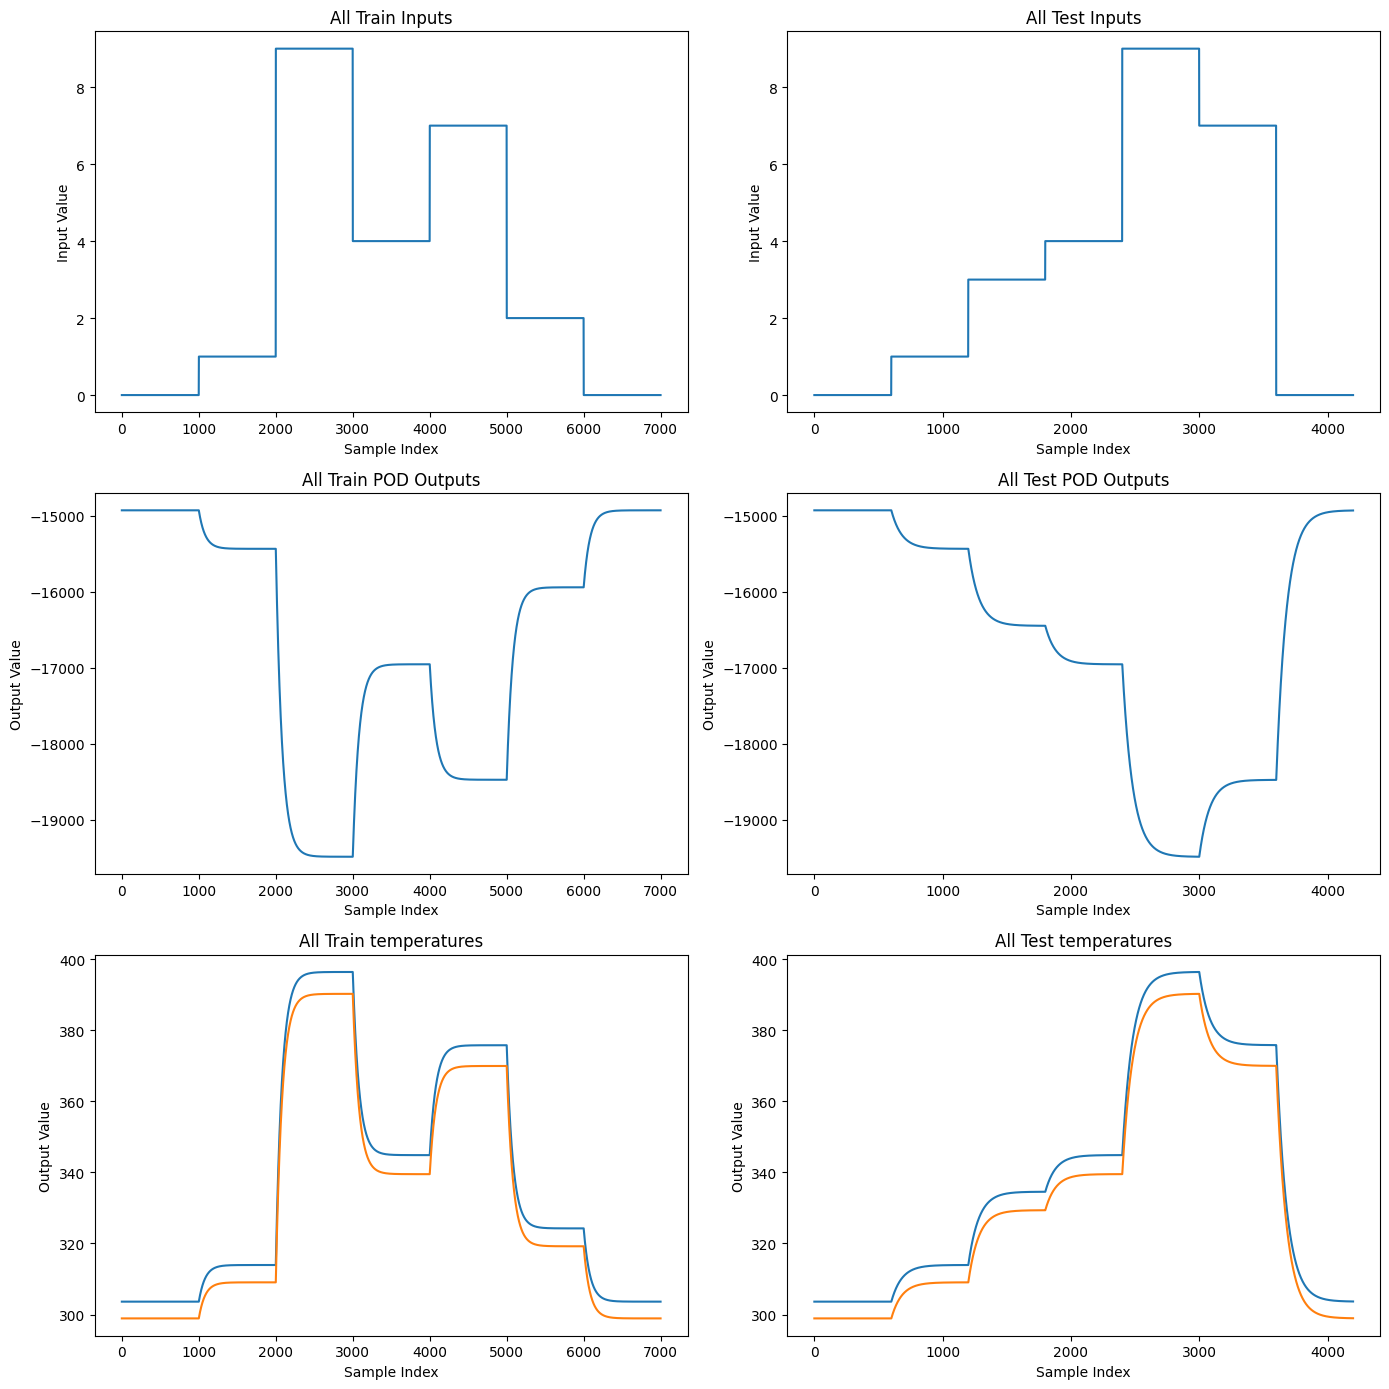

In [4]:
# Plotting all train inputs, test inputs, train outputs, and test outputs side by side without legend
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Make a copy of input_train and input_test
input_train_plot = input_train.copy()
input_test_plot = input_test.copy()

# Plotting train inputs
for j in range(num_inputs):
    axes[0, 0].plot(range(len(input_train_plot)), input_train_plot[:, j], label=f'Input {j+1} (Train)')

axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('Input Value')
axes[0, 0].set_title('All Train Inputs')

# Plotting test inputs
for j in range(num_inputs):
    axes[0, 1].plot(range(len(input_test_plot)), input_test_plot[:, j], label=f'Input {j+1} (Test)')

axes[0, 1].set_xlabel('Sample Index')
axes[0, 1].set_ylabel('Input Value')
axes[0, 1].set_title('All Test Inputs')

# Plotting train POD outputs
for i in range(num_states):
    axes[1, 0].plot(range(temp_train.shape[1]), output_train[i, :], label=f'Output {i+1} (Train)')

axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].set_ylabel('Output Value')
axes[1, 0].set_title('All Train POD Outputs')

# Plotting test POD outputs
for i in range(num_states):
    axes[1, 1].plot(range(output_test.shape[1]), output_test[i, :], label=f'Output {i+1} (Test)')

axes[1, 1].set_xlabel('Sample Index')
axes[1, 1].set_ylabel('Output Value')
axes[1, 1].set_title('All Test POD Outputs')

# Plotting train temperatures
for i in range(num_outputs):
    axes[2, 0].plot(range(temp_train.shape[1]), temp_train[i, :], label=f'Output {i+1} (Train)')

axes[2, 0].set_xlabel('Sample Index')
axes[2, 0].set_ylabel('Output Value')
axes[2, 0].set_title('All Train temperatures')

# Plotting test temperatures
for i in range(num_outputs):
    axes[2, 1].plot(range(output_test.shape[1]), temp_test[i, :], label=f'Output {i+1} (Test)')

axes[2, 1].set_xlabel('Sample Index')
axes[2, 1].set_ylabel('Output Value')
axes[2, 1].set_title('All Test temperatures')

plt.tight_layout()
plt.show()
